In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
fx = lambda x : np.sin(x) #a sinistra di : ci sono gli argomenti, a destra la funzione
x = np.linspace(0, 2* np.pi, 100)
y = fx(x)

In [4]:
#implemento l'interpolatore lineare
def linear_interpolator(x, x_nodes, y_nodes):
  #compute the index
  index = np.digitize(x, x_nodes)-1 #dati gli oggetti e i bin, mi dice in quale bin cade l'oggetto
  #compute the interpolation value
  y = y_nodes[index] + (y_nodes[index+1] - y_nodes[index])*(x - x_nodes[index])/(x_nodes[index+1] - x_nodes[index]) 
  return y

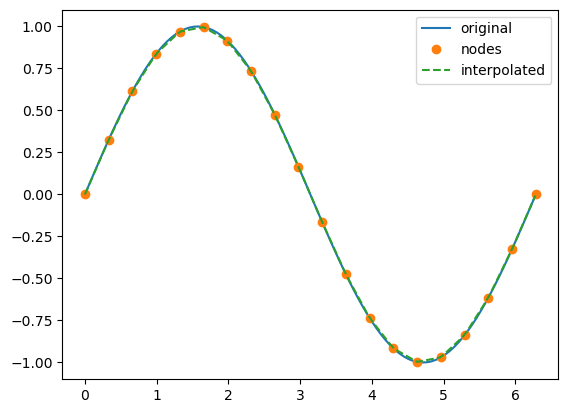

In [5]:
x_nodes = np.linspace(0, 2* np.pi, 20)
y_nodes = fx(x_nodes)

x_interp = np.linspace(0, 2*np.pi*0.999, 100)
y_interp = linear_interpolator(x_interp, x_nodes, y_nodes)

plt.plot(x, y, label='original')
plt.plot(x_nodes, y_nodes, 'o', label='nodes')
plt.plot(x_interp, y_interp, '--', label='interpolated')
plt.legend()
plt.show()

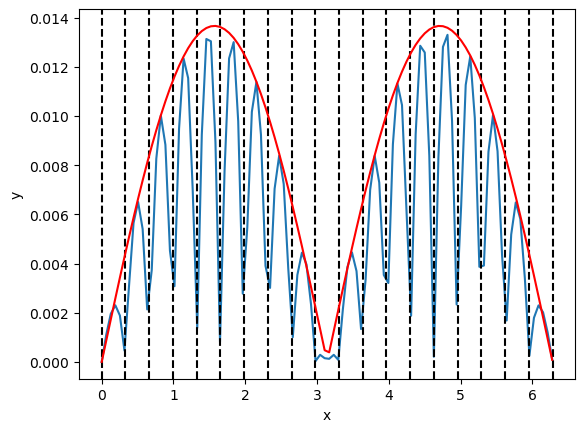

In [6]:
y_true=fx(x_interp)

diff=np.abs(y_interp-y_true)

plt.plot(x_interp,diff)
plt.xlabel('x')
plt.ylabel('y')

for i in range(len(x_nodes)):
    plt.axvline(x=x_nodes[i],color='k',linestyle='--')

plt.plot(x_interp, np.abs(np.sin(x_interp)*(x_nodes[1]-x_nodes[0])**2/8), color='red') #interpolo errori
plt.show()

#il plot è l'errore e al centro è più basso perchè la funzione è circa lineare
#dei nodi l'errore è zero

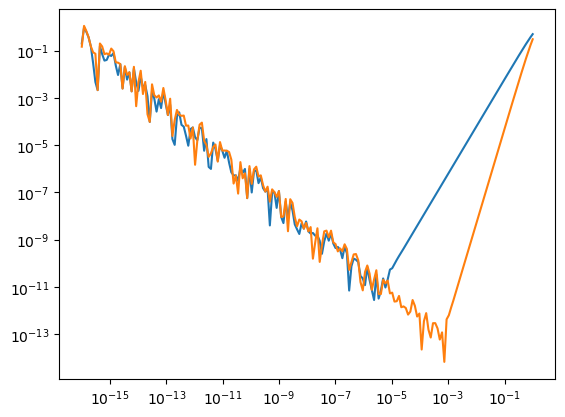

In [9]:
#Derivazione
hlist = np.logspace(-16, 0,200)
fx = lambda x : np.sin(x)**2
#calcola la derivata al primo ordine in un punto
x_cen =1

err_1=[]
err_2 =[]
for i in range(len(hlist)):
    diff_1=(fx(x_cen +hlist[i])-fx(x_cen-hlist[i]))/(2*hlist[i])
    #vado a ordine sup
    diff_2=(2./3*fx(x_cen +hlist[i])-2./3*fx(x_cen-hlist[i])-1./12*fx(x_cen +2*hlist[i])+1./12*fx(x_cen-2*hlist[i]))/(hlist[i])
    err_1.append(np.abs(diff_1-2*np.sin(x_cen)*np.cos(x_cen))) #qui c'è la derivata calcolata analiticamente
    err_2.append(np.abs(diff_2-2*np.sin(x_cen)*np.cos(x_cen)))

plt.loglog(hlist, err_1)
plt.loglog(hlist, err_2)
plt.show()

#aumentano la precisione perdo punti ai bordi